In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn.functional as F
import torch

from common import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [ ]:
import torch.nn.functional as F

def cm_win(winsize: int):
    labels = torch.tensor([
        [0, 0, 0, 1, 0, 0, 0], 
        [0, 1, 0, 0, 0, 0, 0], 
        [0, 1, 1, 0, 0, 0, 0]
    ])
    print(labels, labels.size())
    labels = labels.flatten()

    gt_labels = torch.tensor([
        [0, 0, 0, 0, 1, 0, 0], 
        [0, 0, 0, 0, 0, 1, 0], 
        [0, 1, 0, 0, 0, 0, 0]
    ])
    print(gt_labels, gt_labels.size())
    
    print(metrics._skm.confusion_matrix(gt_labels.flatten(), labels))

    indexes = (gt_labels == 1).nonzero()
    print(indexes, indexes.size())

    gt_w = gt_labels.clone()
    for x, y in indexes:
        for i in range(-winsize, winsize+1):
            if 0 <= y+i < gt_labels.size(1):
                gt_w[x, y+i] = 1
    print(gt_w, gt_w.size())

    print(metrics._skm.confusion_matrix(gt_w.flatten(), labels))
    print(metrics._skm.confusion_matrix(1 - gt_w.flatten(), 1 - labels))


cm_win(2)

tensor([[0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0]])
tensor([[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0]])
tensor([[ 0.1385, -0.0820, -0.3473,  1.3596,  0.0963, -0.2714,  0.0692],
        [-0.1921,  0.8556,  0.2404,  0.3120, -0.0579, -0.0826, -0.0803],
        [-0.0300,  0.6896,  1.1900,  0.1566,  0.2576, -0.2784,  0.3593]],
       dtype=torch.float64)
tensor([[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0]])


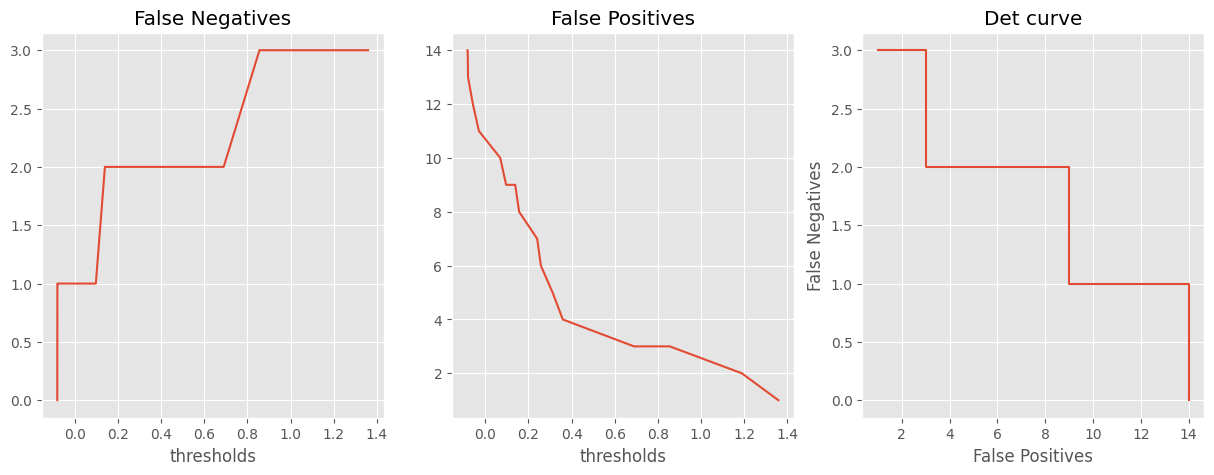

tensor([[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0]])
tensor([[ 0.1385, -0.0820, -0.3473,  1.3596,  0.0963, -0.2714,  0.0692],
        [-0.1921,  0.8556,  0.2404,  0.3120, -0.0579, -0.0826, -0.0803],
        [-0.0300,  0.6896,  1.1900,  0.1566,  0.2576, -0.2784,  0.3593]],
       dtype=torch.float64)
tensor([[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0]])


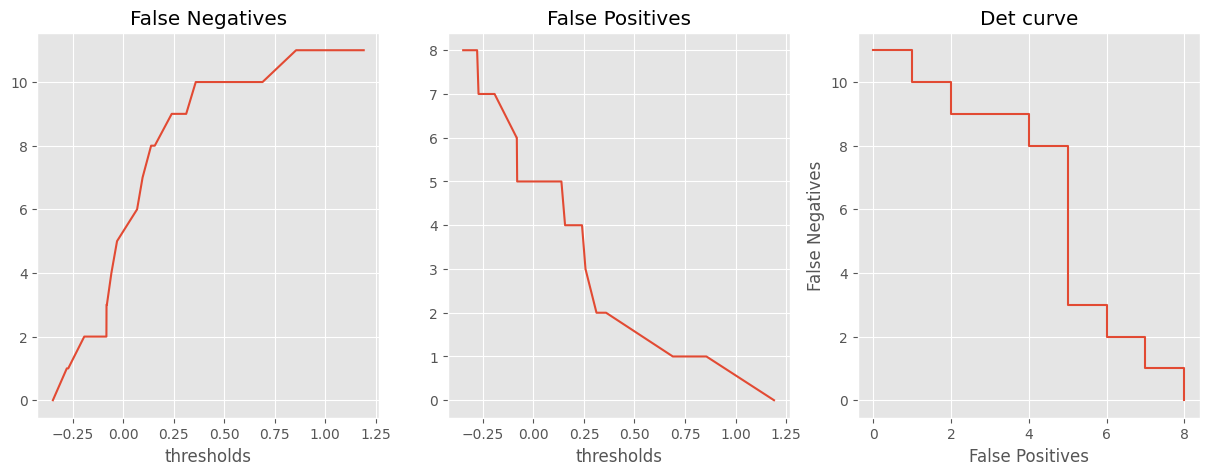

In [4]:
def cm_win(winsize: int):
    signals = torch.tensor(
        [
            [0.1385, -0.0820, -0.3473, 1.3596, 0.0963, -0.2714, 0.0692],
            [-0.1921, 0.8556, 0.2404, 0.3120, -0.0579, -0.0826, -0.0803],
            [-0.0300, 0.6896, 1.1900, 0.1566, 0.2576, -0.2784, 0.3593],
        ],
        dtype=torch.float64,
    )
    gt_labels = torch.tensor(
        [[0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0]]
    )

    print(metrics.fill_tolerance(gt_labels, 2))

    print(gt_labels)
    print(signals)
    print((signals > 0.5).to(int))
    fp, fn, th = metrics.errors_curve_2(signals, gt_labels, 0)
    metrics.plot_errors_curve(fp, fn, th)
    print(gt_labels)
    print(signals)
    print((signals > 0.5).to(int))
    fp, fn, th = metrics.errors_curve_2(signals, gt_labels, winsize)
    metrics.plot_errors_curve(fp, fn, th)


cm_win(2)